<h1> Analyse de la structure de bandes électroniques de ScCuO2 <h1/>

In [46]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.constants import hbar
import matplotlib.pyplot as plt
from pymatgen.electronic_structure import plotter

In [47]:
mp_key = "emUreNDiEdgEatR8YwlD3hfzF9Onx8tt"
mp_id = "mp-4636"

In [48]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

<h2> Bande interdite </h2>

In [49]:
fig_el_bs_and_dos = get_plot_bs_and_dos(el_bs, el_dos, plot_range=[-4,7])
band_gap = el_bs.get_band_gap()
fig_el_bs_and_dos.show()
print(band_gap)

{'direct': True, 'energy': 2.3904999999999994, 'transition': 'L-L'}


La bande interdite est l'écart d'énergie entre la bande de valence la plus haute (qui se trouve juste en dessous du niveau de Fermi) et la bande de conduction la plus basse (juste au-dessus du niveau de Fermi). Il s'agit d'une bande de valeurs énergétiques dont les niveaux ne peuvent pas être occupés par les électrons du cristal.
On peut voir qu'il s'agit d'une bande interdite d'une largeur de 2.39eV. Sur base de cette valeur, on peut conclure que ScCuO2 est un semi-conducteur. On peut également voir qu'il s'agit d'une bande interdite directe. En effet, le minimum de la bande de conduction ainsi que le maximum de la bande de valence se trouvent au même vercteur d'onde k (ici en k = L). Cette transition est notée L-L, ce qui signifie que la transition directe se fait bien en k = L (où L représente un point spécifique de la zone de Brillouin de ScCuO2). On a également un maximum pour la bande de valence et un minimum pour la bande de conduction en k = Z/L.

<h2> Direction dans laquelle la bande de valence et de conduction ont le plus et le moins de dispersion </h2>

<h3> Dispersion </h3>

La disperion est un phénomène qui fait référence à la manière dont l'énergie des électrons dans une bande varie en fonction de leur vecteur d'onde k dans le réseau cristallin d'un matériau. Pour cela, on va déterminer les pentes maximales et minimales repsectivement de chaque branche pour ces bandes. Une pente maximale correspondra à un maximum de dispersion et une pente minimale à un minimum de dispersion.

<h3> Dernière bande de valence </h3>

In [50]:
cbm = el_bs.get_vbm()
print(vbm['band_index'])

defaultdict(<class 'list'>, {<Spin.up: 1>: [19]})


On voit donc que la dernière bande de valence est la bande 19 (20 sur le graphe ci-dessus, mais dans le cas des index on commence à compter à partir de 0)

<h3> Première bande de conduction </h3>

In [51]:
cbm = el_bs.get_cbm()
print(cbm['band_index'])

defaultdict(<class 'list'>, {<Spin.up: 1>: [20]})


On voit donc que la première bande de conduction est la bande 20 (21 sur le graphe ci-dessus, mais dans le cas des index on commence à compter à partir de 0)

<h3> Directions de dispersion </h3>

In [52]:
bsp = BSPlotter(el_bs)
data = bsp.bs_plot_data()
energy = data['energy']
distances = data['distances']

valence = []
conduction = []

for i in range(len(distances)) : 
    dx = distances[i][0] - distances[i][-1]
    
    dy_Val = energy['1'][i][19][0] - energy['1'][i][11][-1]
    dy_Cond = energy['1'][i][20][0] - energy['1'][i][12][-1]
    
    valence.append(abs(dy_Val/dx))
    conduction.append(abs(dy_Cond/dx))

val_MAX = max(valence)
val_MIN = min(valence)
cond_MAX = max(conduction)
cond_MIN = min(conduction)
val_max = valence.index(val_MAX)
val_min = valence.index(val_MIN)
cond_max = conduction.index(cond_MAX)
cond_min = conduction.index(cond_MIN)



print("Dispersion maximale sur la dernière bande de valence :", val_MAX, "(eV)")
print("Dispersion minimale sur la dernière bande de valence :", val_MIN, "(eV)")
print("Dispersion maximale sur la première bande de conduction :", cond_MAX, "(eV)")
print("Dispersion minimale sur la première bande de conduction :", cond_MIN, "(eV)")

Dispersion maximale sur la dernière bande de valence : 19.335391645102487 (eV)
Dispersion minimale sur la dernière bande de valence : 2.5203430956839643 (eV)
Dispersion maximale sur la première bande de conduction : 36.14927277410442 (eV)
Dispersion minimale sur la première bande de conduction : 4.858905295318418 (eV)


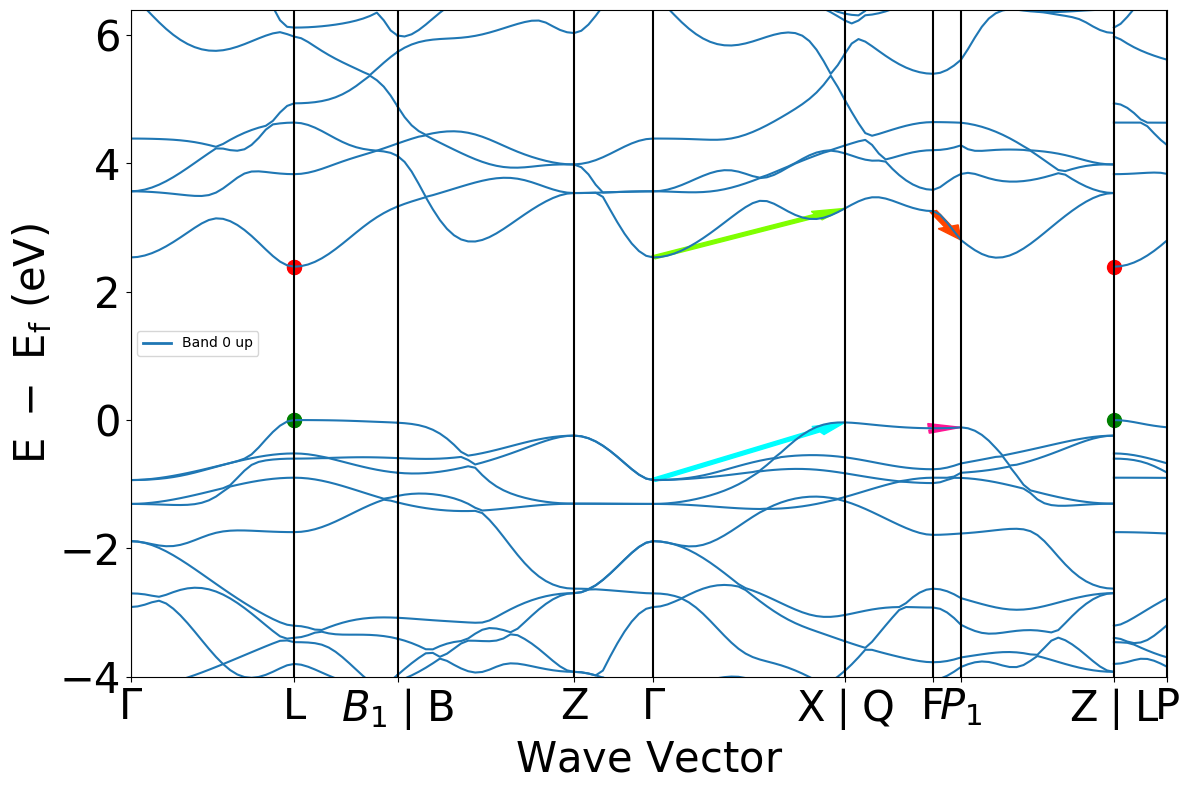

In [53]:
bsp.get_plot(vbm_cbm_marker = True)

plt.arrow(distances[val_min][0], energy['1'][val_min][19][0], 
          distances[val_min][-1]-distances[val_min][0], energy['1'][val_min][19][-1]-energy['1'][val_min][19][0],
          width = 0.05,length_includes_head=True,color='cyan') 

plt.arrow(distances[val_max][0], energy['1'][val_max][19][0], 
          distances[val_max][-1]-distances[val_max][0], energy['1'][val_max][19][-1]-energy['1'][val_max][19][0],
          width = 0.05,length_includes_head=True,color='deeppink') 

plt.arrow(distances[cond_min][0],energy['1'][cond_min][20][0], 
          distances[cond_min][-1]-distances[cond_min][0], energy['1'][cond_min][20][-1]-energy['1'][cond_min][20][0],
          width = 0.05,length_includes_head=True,color='chartreuse')

plt.arrow(distances[cond_max][0], energy['1'][cond_max][20][0], 
          distances[cond_max][-1]-distances[cond_max][0], energy['1'][cond_max][20][-1]-energy['1'][cond_max][20][0],
          width = 0.05,length_includes_head=True,color='orangered')

<h3> Dispersion sur la dernière bande de valence </h3>

La plus grande dispersion pour la dernière bande de valence a lieu sur : F - $P_1$. Elle est ici représentée en rose.  

La plus petite dispersion pour la dernière bande de valence a lieu sur : $\Gamma$ - X|Q. Elle est ici représentée en bleu.

<h3> Dispersion sur la première bande de conduction </h3>

La plus grande dispersion pour la première bande de conduction a lieu sur : F - $P_1$. Elle est ici représentée en rouge.  

La plus petite dispersion pour la première bande de conduction a lieu sur : $\Gamma$ - X|Q. Elle est ici représentée en vert.

<h2> Calcul de la masse effective </h2>

Afin de calculer la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction, on va utiliser une dispersion parabolique. On va donc utiliser une approximation parabolique afin de décrire l'énergie $\epsilon$ du vecteur d'onde k : $\epsilon(k) = ak^2 + bk + c$ où $a$ est la courbure de la parabole.  
La masse effective est reliée à la courbure de dispersion via la relation :    $m* = \frac{\hbar^2}{\frac{d^2\epsilon}{dk^2}}$.  
On trouve donc ici que la dérivée seconde de $\epsilon$ vaut : $\frac{d^2\epsilon}{dk^2} = 2a$ et la formule pour la masse effective devient donc : $m^* = \frac{\hbar^2}{2a}$.  
Afin d'obtenir la courbure de dispersion, il suffit d'utiliser deux points proches dans la parabole représentant les extrémas et on peut ensuite calculer notre masse effective dans les deux cas demandés.



<h3> Masse effective au sommet de la dernière bande de valence </h3>

In [54]:
def calcule_masse_effective(k1, e1, k2, e2):
    a = (e2 - e1) / (k2**2 - k1**2)
    m_star = hbar**2 / (2 * a * 1.60218e-19 * (1e-10)**2)

    return a, m_star

k1, e1 = 1.180744, -0.5237 
k2, e2 = 1.22839, -0.5335  

a, m_star = calcule_masse_effective(k1, e1, k2, e2)


print(f"Masse effective m* de la dernière bande de valence : {m_star:.4e} kg")


Masse effective m* de la dernière bande de valence : -4.0651e-29 kg


Ici, la masse effective négative est liée aux les porteurs de charge (trous dans la bande de valence) et à leur manière de réagir à un champ électrique. Cette masse relative négative indique que les porteurs se déplacent dans le sens inverse à celui attendu pour un électron classique.

<h3> Masse effective à la base de la première bande de conduction </h3>

In [55]:
k1, e1 = 0.180744, 2.399
k2, e2 = 1.22839, 2.4244 

a, m_star = calcule_masse_effective(k1, e1, k2, e2)


print(f"Masse effective m* de la première bande de conduction : {m_star:.4e} kg")


Masse effective m* de la première bande de conduction : 2.0172e-28 kg
